<a href="https://colab.research.google.com/github/ZinMinThaw-23/Explicit-Content-Detection/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clean the dataset by removing no match rows

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import re
import pickle
import numpy as np

In [48]:
song_data = pd.read_csv("/content/drive/MyDrive/Explicit Content Analysis/Labeled_Data.csv")
song_data = song_data[['text','explicit_label']]
song_data = song_data.loc[song_data['explicit_label'] != 'no match']
#remove'\n' from the lyrics
re_drop = re.compile(r'\n')        
song_data[['text']] = song_data[['text']].applymap(lambda x:re_drop.sub(' ',x))

song_data

,text,explicit_label
1,"Take it easy with me, please Touch me gently...",False
2,I'll never know why I had to go Why I had to...,False
4,Making somebody happy is a question of give an...,False
7,"Chiquitita, tell me what's wrong You're ench...",False
11,"You can dance, you can jive, having the time o...",False
...,...,...
57593,When you shut your eyes and fell asleep Dark...,False
57605,And I said before I don't want no more And...,False
57608,Nothing to say no place to hide I can't find...,False
57609,You wake up in the morning And you're not fe...,False


Split into training dataset and test dataset

In [49]:
#extract all the rows with explicit_label = True
explicit = song_data.loc[song_data['explicit_label'] == 'True']

In [51]:
explicit

,text,explicit_label
128,I'm sitting in my chair watching the ...,True
129,I'm a big fuckin' dick I'm a pain in your as...,True
909,Singing Radiohead at the top of our lungs Wi...,True
929,Let them know that we're still rock n roll I...,True
2089,"Give me all, give me all, give me all your att...",True
...,...,...
57544,"What, is this bitch fucking with Z-Ro Mother...",True
57545,"[Hook - 2x] Guerilla till I die, mama don't ...",True
57550,"(Chorus - 2x) Lord tell me why Ooh child, ...",True
57560,"[Z-Ro] Since I been out by myself, I keep th...",True


In [50]:
#ramdomly extract 1356 rows with explicit_label = False, which is 3 times as many as song_data_1
clean = song_data.loc[song_data['explicit_label'] == 'False']
clean = clean.sample(n=1356, replace=False, random_state=100)

In [52]:
clean

,text,explicit_label
51337,Somewhere In heaven There is a place Wai...,False
28056,Now that the past has ended My life's an ope...,False
46109,Dark cloud is coming Headed straight for you...,False
19827,I don't know you And you don't know the half...,False
44161,People see us everywhere They think you real...,False
...,...,...
48972,Sometimes bored and sometimes lonely Pimple ...,False
20499,Angeliou oh Angeliou Oh oh Angeliou Angeliou...,False
9428,"Hush my baby, Don't you cry. I'll dry your e...",False
23537,"You insult me in my home, you're forgiven this...",False


In [53]:
X = explicit.iloc[:,:-1].append(clean.iloc[:,:-1])
X

,text
128,I'm sitting in my chair watching the ...
129,I'm a big fuckin' dick I'm a pain in your as...
909,Singing Radiohead at the top of our lungs Wi...
929,Let them know that we're still rock n roll I...
2089,"Give me all, give me all, give me all your att..."
...,...
48972,Sometimes bored and sometimes lonely Pimple ...
20499,Angeliou oh Angeliou Oh oh Angeliou Angeliou...
9428,"Hush my baby, Don't you cry. I'll dry your e..."
23537,"You insult me in my home, you're forgiven this..."


In [54]:
Y = explicit.iloc[:,-1].append(clean.iloc[:,-1])
Y

128       True
129       True
909       True
929       True
2089      True
         ...  
48972    False
20499    False
9428     False
23537    False
53174    False
Name: explicit_label, Length: 2712, dtype: object

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1356, random_state=100)



In [74]:
train_list = X_train.text.values.tolist()
len(train_list)

1356

In [75]:
test_list = X_test.text.values.tolist()
len(test_list)

1356

In [57]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#Define Explicit to 1, Clean to 0
train_label = []
for i in range(len(Y_train)):
    o = Y_train.iloc[i]
    if o=="False":
        o = 0
    else:
        o = 1
    train_label.append(o)

In [84]:
train_label=np.array(train_label)

In [60]:
test_label = []
for i in range(len(Y_test)):
    p = Y_test.iloc[i]
    if p=="False":
        p = 0
    else:
        p = 1
    test_label.append(p)

In [85]:
test_label=np.array(test_label)

In [62]:
vocab_size = 500
embedding_dim = 64
max_length = 150
trunc_type='post'        #put needed '0's for max length
oov_tok = "<OOV>"

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_list)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_list)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type,padding='post')

testing_sequences = tokenizer.texts_to_sequences(test_list)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type,padding='post')

In [79]:
testing_padded

array([[  4, 405,   8, ...,  10,  56,  61],
       [458,   1, 458, ..., 392, 392,  35],
       [222, 413, 158, ...,  44,  71,   1],
       ...,
       [  1,   2,   1, ...,   0,   0,   0],
       [  1,   1,   1, ..., 430,   1,   1],
       [  2,   1,  19, ..., 263,  67,  35]], dtype=int32)

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
filename = '/content/drive/MyDrive/Explicit Content Analysis/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [86]:
num_epochs = 10
history = model.fit(padded, train_label, epochs=num_epochs,verbose = 2)

Epoch 1/10
43/43 - 1s - loss: 0.6621 - accuracy: 0.5855 - 1s/epoch - 32ms/step
Epoch 2/10
43/43 - 0s - loss: 0.3603 - accuracy: 0.8827 - 460ms/epoch - 11ms/step
Epoch 3/10
43/43 - 0s - loss: 0.1035 - accuracy: 0.9742 - 451ms/epoch - 10ms/step
Epoch 4/10
43/43 - 0s - loss: 0.0346 - accuracy: 0.9926 - 452ms/epoch - 11ms/step
Epoch 5/10
43/43 - 0s - loss: 0.0104 - accuracy: 0.9993 - 442ms/epoch - 10ms/step
Epoch 6/10
43/43 - 0s - loss: 0.0050 - accuracy: 1.0000 - 494ms/epoch - 11ms/step
Epoch 7/10
43/43 - 0s - loss: 0.0030 - accuracy: 1.0000 - 439ms/epoch - 10ms/step
Epoch 8/10
43/43 - 0s - loss: 0.0021 - accuracy: 1.0000 - 438ms/epoch - 10ms/step
Epoch 9/10
43/43 - 0s - loss: 0.0016 - accuracy: 1.0000 - 478ms/epoch - 11ms/step
Epoch 10/10
43/43 - 0s - loss: 0.0012 - accuracy: 1.0000 - 427ms/epoch - 10ms/step


In [ ]:
model.save('/model.h5')

In [87]:
model.evaluate(padded,train_label)

43/43 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000


[0.0010193708585575223, 1.0]

In [88]:
model.evaluate(testing_padded,test_label)

43/43 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.7419


[0.7547006011009216, 0.7418879270553589]

In [89]:
result = model.predict(testing_padded)

43/43 [==============================] - 0s 4ms/step


In [90]:
for i,j in zip(result,test_list):
    print(j.strip())
    print(i)
    print()

You cut me down a tree   And brought it back to me   And that's what made me see   Where I was going wrong   You put me on a shelf   And kept me for yourself   I can only blame myself   You can only blame me      And I could write a song   A hundred miles long   Well, that's where I belong   And you belong to me      And I could write it down   Or spread it all around   Get lost and then get found   Or swallowed in the sea      You put me on a line   And hung me out to dry   And darling that's when I   Decided to go to sea      You cut me down to size   And opened up my eyes   Made me realize   What I could not see      And I could write a book   The one they'll say that shook   The world, and then it took   It took it back from me      And I could write it down   Or spread it all around   Get lost and then get found   And you'll come back to me   Not swallowed in the sea      Ooh      And I could write a song   A hundred miles long   Well, that's where I belong   And you belong with m

In [91]:
predicted_results=[]
for i in result:
    if(i<0.5):
        predicted_results.append(0)
    else:
        predicted_results.append(1)

In [93]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_label,predicted_results)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[506 159]
 [191 500]]


In [95]:
# Evaluation Metrics


from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score',accuracy_score(test_label,predicted_results)*100,'%')
print('Precision Macro Score',precision_score(test_label,predicted_results,average = 'macro')*100,'%')
print('Recall_Score',recall_score(test_label,predicted_results, average = 'macro')*100,'%')
print('F1_Score',f1_score(test_label,predicted_results, average = 'macro')*100,'%')

Accuracy Score 74.18879056047197 %
Precision Macro Score 74.23468887906768 %
Recall_Score 74.22456285431377 %
F1_Score 74.18828520150106 %


Text(0.5, 1.0, 'Training and validation loss')

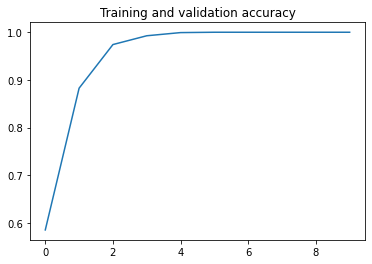

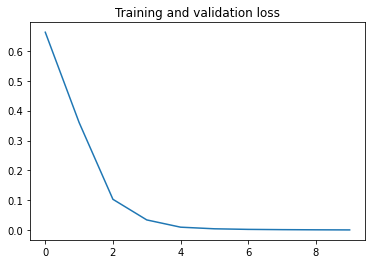

In [96]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , label ='accuracy')
#plt.plot  ( epochs, val_acc,label='val_accuracy' )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='accuracy')
#plt.plot  ( epochs, val_loss, label='val_accuracy')
plt.title ('Training and validation loss')